In [ ]:
to_cover = {1: " Data (Prepare and Load)",
            2: " Build Model",
            3: " Fitting model to Data (training)",
            4: " Making Predictions and evaluating the model ",
            5: " Saving and loading the model",
            6: " Putting it all together"
            }
to_cover

{1: ' Data (Prepare and Load)',
 2: ' Build Model',
 3: ' Fitting model to Data (training)',
 4: ' Making Predictions and evaluating the model ',
 5: ' Saving and loading the model',
 6: ' Putting it all together'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [ ]:
weight = 0.8
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight  * X + bias
X[:10], y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3160],
         [0.3320],
         [0.3480],
         [0.3640],
         [0.3800],
         [0.3960],
         [0.4120],
         [0.4280],
         [0.4440]]))

In [ ]:
len(X), len(y)


(50, 50)

In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels,c="b", s=4,label="training data")

  plt.scatter(test_data, test_labels,c="g", s=4,label= "testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});


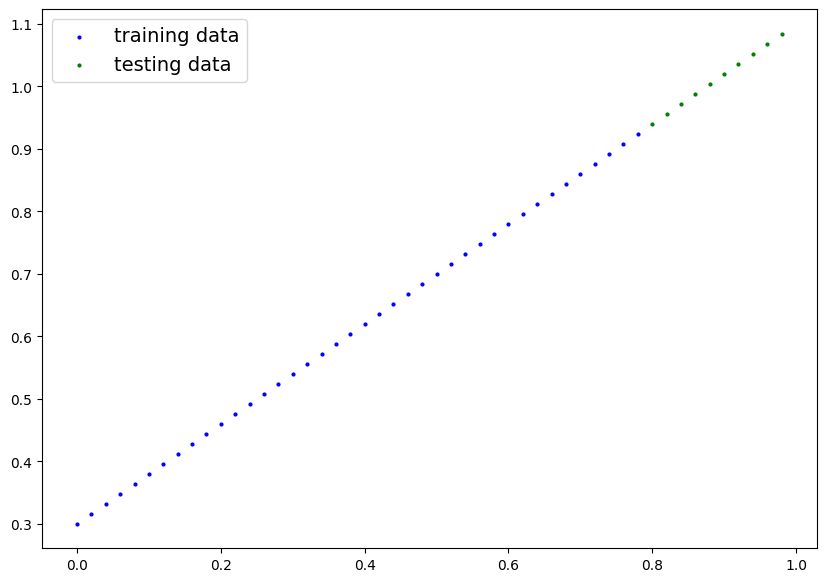

In [ ]:
plot_predictions();


In [ ]:
import torch

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [ ]:

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.9400],
        [0.9560],
        [0.9720],
        [0.9880],
        [1.0040],
        [1.0200],
        [1.0360],
        [1.0520],
        [1.0680],
        [1.0840]])

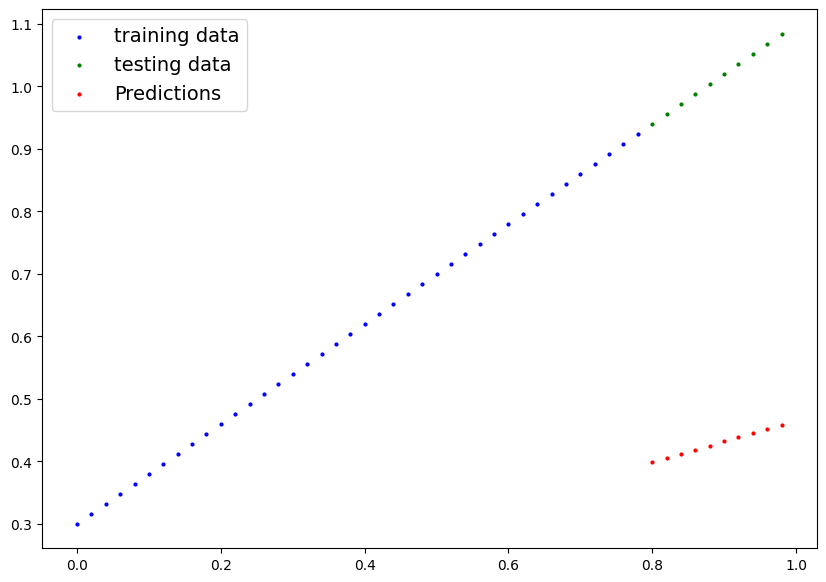

In [ ]:


plot_predictions(predictions=y_preds)

In [ ]:
loss_fn = nn.L1Loss() # Mean Absolute Error

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
#epochs = 10
#epochs = 100
#epochs = 250
#epochs = 260
# epochs = 280
#epochs = 320
# epochs = 400
#epochs = 550
#epochs = 650
#epochs = 800
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 100 == 0:
             epoch_count.append(epoch)
             train_loss_values.append(loss.detach().numpy())
             test_loss_values.append(test_loss.detach().numpy())
             print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.35188138484954834 | MAE Test Loss: 0.5700652599334717
Epoch: 100 | MAE Train Loss: 0.04225591570138931 | MAE Test Loss: 0.09837077558040619
Epoch: 200 | MAE Train Loss: 0.007918182760477066 | MAE Test Loss: 0.017706001177430153
Epoch: 300 | MAE Train Loss: 0.008510843850672245 | MAE Test Loss: 0.0002953052462544292
Epoch: 400 | MAE Train Loss: 0.008510843850672245 | MAE Test Loss: 0.0002953052462544292
Epoch: 500 | MAE Train Loss: 0.008510843850672245 | MAE Test Loss: 0.0002953052462544292
Epoch: 600 | MAE Train Loss: 0.008510843850672245 | MAE Test Loss: 0.0002953052462544292
Epoch: 700 | MAE Train Loss: 0.008510843850672245 | MAE Test Loss: 0.0002953052462544292
Epoch: 800 | MAE Train Loss: 0.008510843850672245 | MAE Test Loss: 0.0002953052462544292
Epoch: 900 | MAE Train Loss: 0.008510843850672245 | MAE Test Loss: 0.0002953052462544292


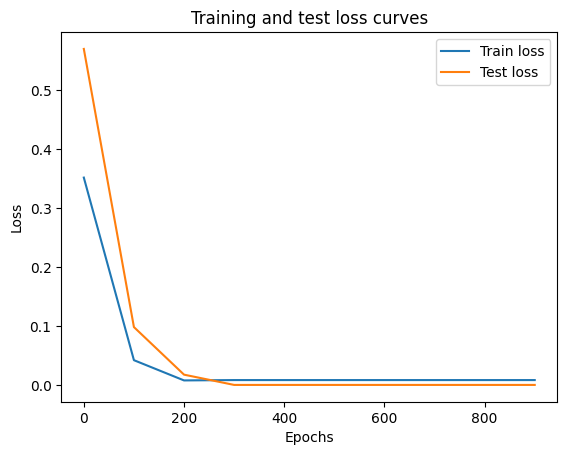

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# :( :( :(
# Find our model's learned parameters

print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7902])), ('bias', tensor([0.2953]))])

And the original values for weights and bias are:
weights: 0.8, bias: 0.3


In [ ]:
# Predictions Again!!!!!!!


with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.9275],
        [0.9433],
        [0.9591],
        [0.9749],
        [0.9907],
        [1.0065],
        [1.0223],
        [1.0381],
        [1.0539],
        [1.0697]])

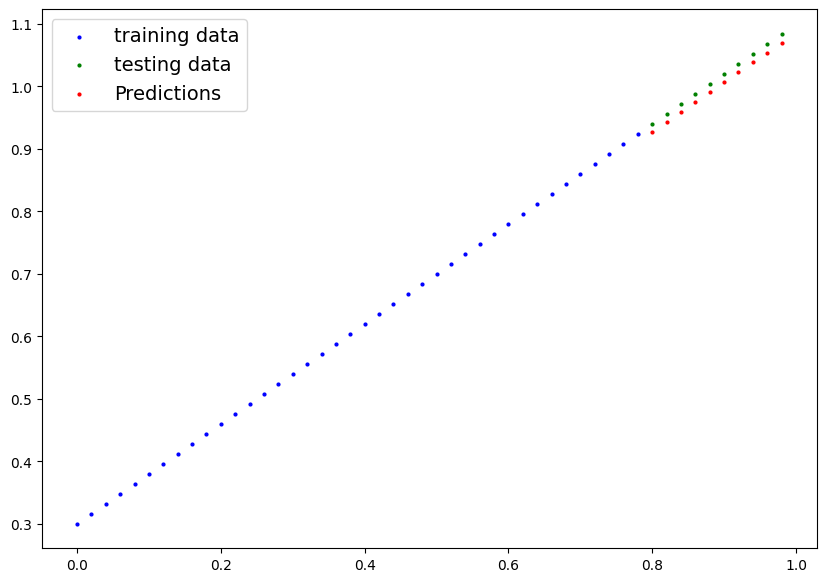

In [ ]:

plot_predictions(predictions=y_preds);

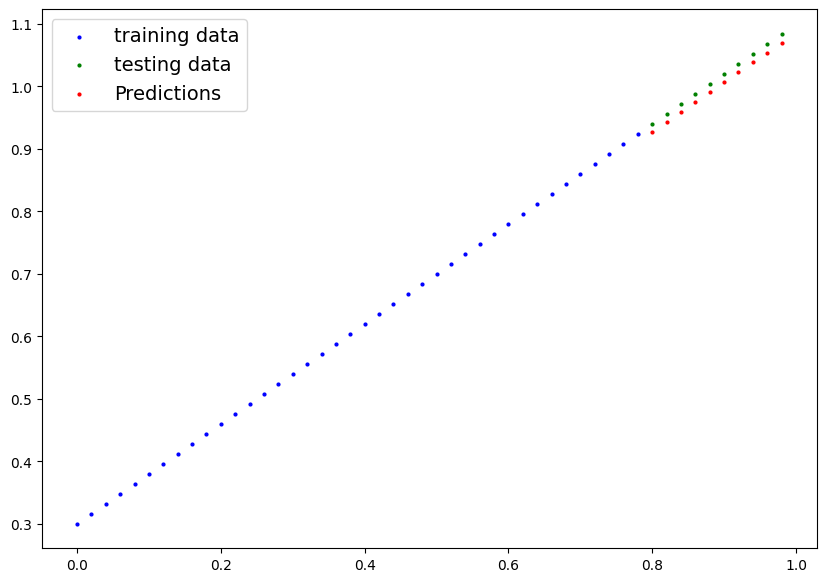

In [ ]:
plot_predictions(predictions=y_preds.cpu())

In [ ]:

# inc the number of epochs i.e inputs &
## rerun the code to improvise <--->


In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "pytorch_01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_01.pth


In [ ]:
!ls -l models/pytorch_01.pth

-rw-r--r-- 1 root root 1514 Jan  7 20:35 models/pytorch_01.pth


In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
#Now to test our loaded model, let's perform inference with it (make predictions) on the test data.

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])